In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np

from astropy.coordinates import SkyCoord
from astropy import units

In [96]:
brickname = '2408p222'
output = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/dr9_test/tractor/240/2408p222/rs0/tractor-2408p222.fits')
Input = fits.getdata('/global/cscratch1/sd/huikong/Obiwan/dr9m/obiwan_out/dr9m_test/divided_randoms/brick_2408p222.fits')[:200]


In [97]:
flux = output['flux_w1']
mwtransmission = output['mw_transmission_w1']
ag= 22.5 - 2.5 * np.log10(flux / mwtransmission)

mag_g = 22.5 - 2.5 * np.log10(output['flux_g'] / output['mw_transmission_g'])

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10


In [98]:
np.median(np.sqrt(1./output['flux_ivar_w1'][i2]))


0.50097412

In [105]:
output.columns

ColDefs(
    name = 'release'; format = 'I'
    name = 'brickid'; format = 'J'
    name = 'brickname'; format = '8A'
    name = 'objid'; format = 'J'
    name = 'brick_primary'; format = 'L'
    name = 'maskbits'; format = 'I'
    name = 'fitbits'; format = 'I'
    name = 'type'; format = '3A'
    name = 'ra'; format = 'D'; unit = 'deg'
    name = 'dec'; format = 'D'; unit = 'deg'
    name = 'ra_ivar'; format = 'E'; unit = '1/deg^2'
    name = 'dec_ivar'; format = 'E'; unit = '1/deg^2'
    name = 'bx'; format = 'E'
    name = 'by'; format = 'E'
    name = 'dchisq'; format = '5E'
    name = 'ebv'; format = 'E'; unit = 'mag'
    name = 'mjd_min'; format = 'D'
    name = 'mjd_max'; format = 'D'
    name = 'ref_cat'; format = '2A'
    name = 'ref_id'; format = 'K'
    name = 'pmra'; format = 'E'; unit = 'mas/yr'
    name = 'pmdec'; format = 'E'; unit = 'mas/yr'
    name = 'parallax'; format = 'E'; unit = 'mas'
    name = 'pmra_ivar'; format = 'E'; unit = '1/(mas/yr)^2'
    name = 'pmdec_iv

In [99]:
cat1 = SkyCoord(ra=output['ra']*units.degree, dec=output['dec']*units.degree)
cat2 = SkyCoord(ra=Input['ra']*units.degree, dec=Input['dec']*units.degree)
i2, d2d, d3d = cat2.match_to_catalog_sky(cat1,nthneighbor=1) 

In [100]:
np.array(d2d)

array([  8.84051425e-05,   8.38499429e-03,   6.26390235e-06,
         1.07585192e-05,   3.41286842e-03,   6.74860206e-05,
         2.16208320e-06,   3.83100473e-05,   2.08445283e-05,
         1.15623920e-05,   2.67828304e-05,   4.76142645e-05,
         6.28553237e-05,   1.45824425e-05,   2.84710363e-06,
         5.55333152e-06,   4.38772852e-05,   4.65443518e-05,
         1.51750932e-05,   1.68073433e-05,   9.76481047e-05,
         3.85725803e-06,   7.97460743e-06,   2.69619665e-05,
         5.76177912e-05,   1.80150263e-04,   2.54498914e-06,
         2.39282325e-06,   2.89730759e-05,   1.05387819e-05,
         3.62751212e-05,   4.35836560e-05,   8.33286035e-06,
         3.47086157e-05,   1.92558612e-05,   9.21982799e-06,
         2.72912394e-05,   1.34907744e-02,   3.70760422e-05,
         1.14296355e-06,   5.88648135e-05,   5.87914544e-06,
         1.29685156e-06,   4.28778332e-05,   5.22492424e-05,
         3.78313200e-05,   4.02545106e-05,   3.62853835e-05,
         2.04163707e-05,

In [101]:
sel = ag[i2]>0
sel1 = np.array(d2d)<1e-4
ag[i2][sel1]

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


array([ 20.40017319,  21.65522003,  20.9503746 ,  22.48120117,
        21.20921135,          nan,  20.45384026,  19.73536873,
        20.59887695,  22.10268593,  20.30782318,  20.12578583,
        20.50602531,  21.83046341,  22.62273788,  21.50573158,
        18.63573837,  20.98929977,  20.9128437 ,  20.57239723,
        20.54993248,  22.26439667,  21.14537621,  20.26626587,
        18.86264038,  22.22913933,  21.222435  ,  20.13798523,
        20.3553009 ,  20.3288517 ,  21.79728127,  20.88215256,
        19.90959549,  19.75010872,  21.28957558,  18.23202133,
        19.13120842,  20.30302429,  19.10154915,  20.34697342,
        20.27000618,  20.85517311,  20.04290009,  20.65600967,
        22.34615707,  20.26248741,  20.48620415,  22.0775032 ,
        20.29737473,  21.18727684,  19.81835747,  21.34545517,
        20.99480438,  21.44148827,  19.44186783,  21.27399254,
        22.14195251,  22.02966118,  19.98100281,  19.81030846,
        19.75333595,          nan,  18.00606155,  22.01

Text(0.5,1,'real radec')

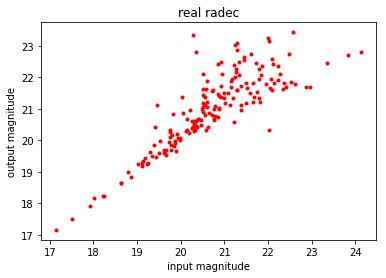

In [51]:
plt.plot(ag[i2][sel&sel1],Input[sel&sel1]['w1'],'r.')
plt.xlabel('input magnitude')
plt.ylabel('output magnitude')
plt.title('real radec')

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


Text(0.5,1,'real radec')

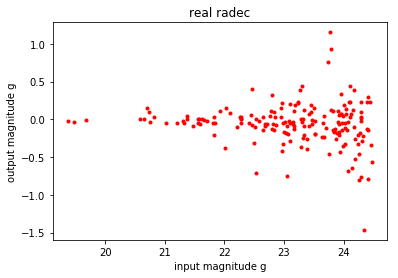

In [52]:
sel = mag_g[i2]>0
plt.plot(Input[sel&sel1]['g'],Input[sel&sel1]['g']-mag_g[i2][sel&sel1],'r.')
plt.xlabel('input magnitude g')
plt.ylabel('output magnitude g')
plt.title('real radec')

In [53]:
mag_g[i2][sel&sel1]

array([ 21.87557602,  22.86791229,  23.87626648,  24.19549561,
        21.33195114,  24.20889854,  23.35131836,  22.39918327,
        23.67158508,  24.51592255,  24.78810883,  23.14759636,
        20.56971359,  23.38545227,  24.06861496,  24.01154327,
        24.14133263,  22.92885017,  25.05899429,  20.6449337 ,
        22.24151611,  24.0806942 ,  24.5666256 ,  23.49184227,
        23.21516609,  22.38975716,  22.98287201,  24.35832787,
        23.39051819,  23.00539589,  23.85536766,  24.72135544,
        23.16678238,  23.63012505,  23.06459236,  20.64845276,
        24.16743279,  22.81142998,  21.73598099,  24.26676559,
        24.3213253 ,  23.81571198,  23.96225166,  23.882967  ,
        23.31925774,  23.2096653 ,  22.93559456,  22.97473526,
        21.80353546,  23.7891674 ,  22.62340927,  23.79315948,
        23.09815216,  23.90302086,  23.29834366,  23.01970291,
        23.26387024,  22.81404877,  25.03882599,  23.79591751,
        23.88565063,  23.54931831,  20.55218506,  23.18

In [54]:
Input[sel&sel1]['g']

array([ 22.02845955,  23.26121902,  23.64431381,  24.06077766,
        21.3105545 ,  24.43519402,  23.42446899,  22.45339966,
        24.11582184,  24.39039612,  24.14697075,  23.09618759,
        20.57699394,  23.09615517,  24.02437401,  23.84370613,
        23.88057518,  22.85868645,  24.25583267,  20.74204063,
        22.26735687,  24.11216354,  24.24372864,  23.47877312,
        23.14994049,  22.00835609,  22.83946991,  24.0306282 ,
        22.96451187,  23.23133278,  23.91631699,  24.26492882,
        22.9947052 ,  23.96377373,  23.17425919,  20.65086937,
        24.40050507,  22.95825005,  21.70851898,  24.28944969,
        24.29368591,  24.00351906,  24.03656769,  23.95058632,
        23.32237625,  23.0261631 ,  22.80259323,  23.73965645,
        21.83312416,  23.39092064,  22.52174187,  23.04709053,
        23.07659531,  23.67247581,  23.17256927,  23.23600578,
        23.06678581,  22.50205994,  24.47975349,  23.90949249,
        23.9516983 ,  23.52363396,  20.70240402,  23.14

Text(0.5,1,'real radec')

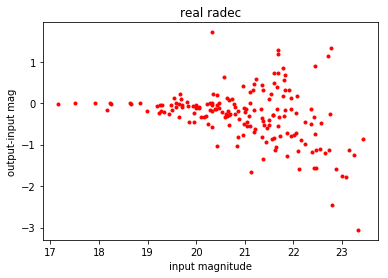

In [102]:
plt.plot(Input[sel&sel1]['w1'],ag[i2][sel*sel1]-Input[sel&sel1]['w1'],'r.')
plt.xlabel('input magnitude')
plt.ylabel('output-input mag')
plt.title('real radec')

In [56]:
input_mag = Input[sel&sel1]['w1']
output_mag = ag[i2][sel*sel1]

ag= 22.5 - 2.5 * np.log10(flux / mwtransmission)

input_flux = 10**(-(input_mag-22.5)/2.5)
output_flux = 10**(-(output_mag-22.5)/2.5)

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10


Text(0.5,1,'real source')

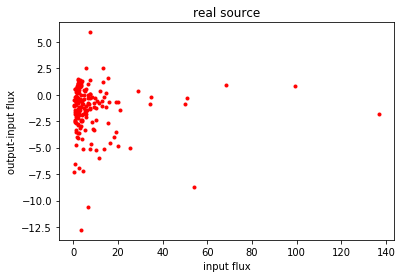

In [57]:
plt.plot(input_flux,input_flux-output_flux,'r.')
plt.xlabel('input flux')
plt.ylabel('output-input flux')
plt.title('real source')


In [103]:
plt.plot(input_flux,(input_flux-output_flux)*np.sqrt(output['flux_ivar_w1'][i2][sel&sel1]),'r.')
plt.xlabel('input flux')
plt.ylabel('output-input flux')
plt.title('real source')

ValueError: operands could not be broadcast together with shapes (200,) (179,) 

In [104]:
ls=(input_flux-output_flux)*np.sqrt(output['flux_ivar_w1'][i2][sel&sel1])

ValueError: operands could not be broadcast together with shapes (200,) (179,) 

In [64]:
len(ls)

179

In [66]:
179*0.68

121.72000000000001

In [65]:
(np.abs(ls)<1).sum()

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


35

In [70]:
(np.abs(ls)<4).sum()

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


122

In [72]:
mag_g = 22.5 - 2.5 * np.log10(output['flux_g'] / output['mw_transmission_g'])
sel1 = np.array(d2d)<1e-4


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


In [84]:
flux_g=output['flux_g']/output['mw_transmission_g']

input_flux = 10**(-(Input['g']-22.5)/2.5)
sel2 = input_flux>0
lsg=(flux_g[i2][sel1&sel2]-input_flux[sel1&sel2])*np.sqrt((output['flux_ivar_g'][i2][sel1&sel2]))

In [85]:
len(lsg)

180

In [86]:
180*0.68

122.4

In [88]:
(np.abs(lsg)<2).sum()

105

In [89]:
lsg.mean()

-0.56124872

In [92]:
(np.abs(lsg)<5).sum()

163

In [93]:
163*0.68

110.84